# Dummy Classifier

This notebook creates dummy classifiers to have a baseline for the classification task.

In [1]:
import json
import pickle
from pathlib import Path

import numpy as np
import torch
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from tqdm.autonotebook import tqdm

from nlp_assemblee.datasets import build_dataset_and_dataloader_from_config
from nlp_assemblee.models import build_classifier_from_config
from nlp_assemblee.simple_visualisation import (
    calculate_metrics,
    calculate_metrics_binary,
    plot_confusion_matrix,
    plot_precision_recall_curve,
    plot_precision_recall_curve_binary,
    plot_roc_curve,
    plot_roc_curve_binary,
)

In [2]:
def load_records(path, phase="train"):
    path = Path(path)
    with open(path / f"precomputed_{phase}.pkl", "rb") as f:
        records = pickle.load(f)
    return records

In [3]:
y_train = load_records("../../data/precomputed/paraphrase-multilingual-MiniLM-L12-v2")["label"]
y_test = load_records("../../data/precomputed/paraphrase-multilingual-MiniLM-L12-v2", phase="test")[
    "label"
]

In [4]:
n = len(y_train)
probas = [np.sum(y_train == i) / n for i in range(3)]

In [5]:
probas

[0.5000770136314128, 0.14021431793427436, 0.3597086684343129]

## Uniform

Micro-averaged One-vs-Rest ROC AUC score:
0.50
Macro-averaged One-vs-Rest ROC AUC score:
0.50


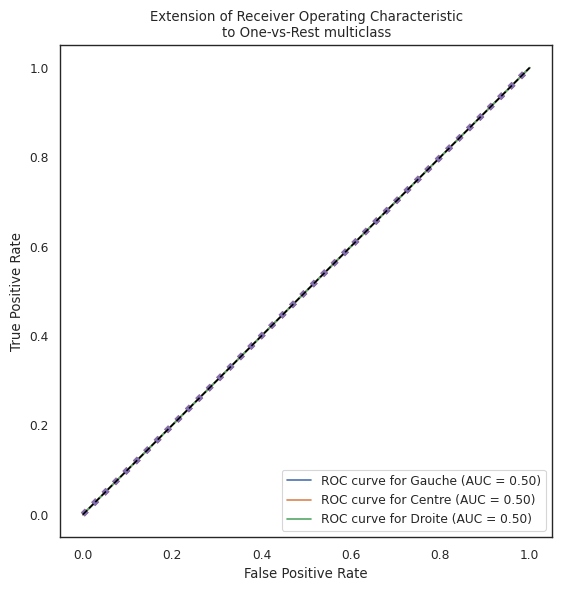

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


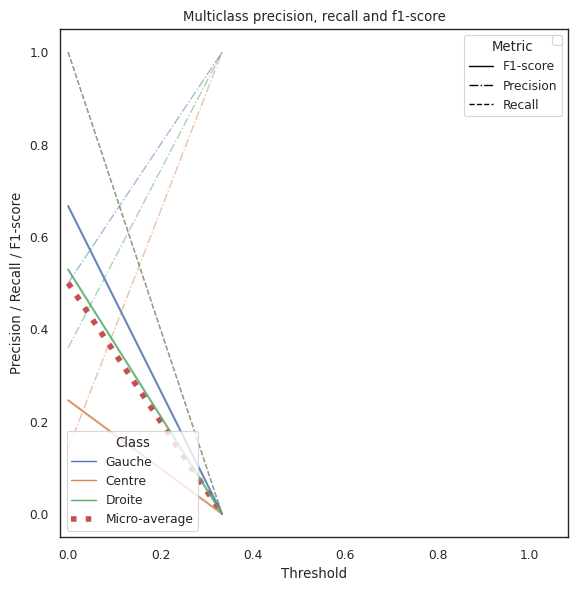

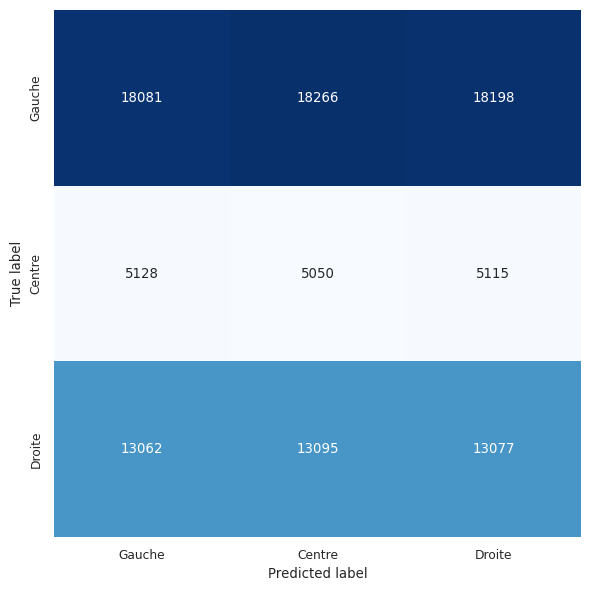

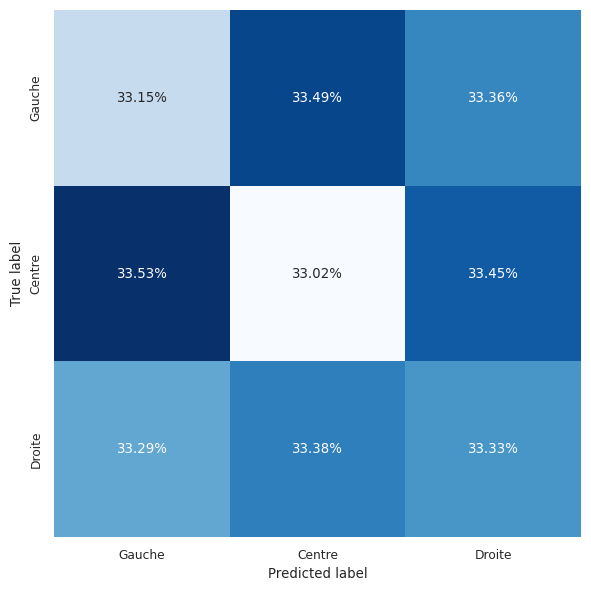

In [41]:
strategy = "uniform"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train, y_train)

y_pred = dummy.predict(y_test)
probs = dummy.predict_proba(y_test)

results = {
    "labels": y_test,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_matrix_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_matrix_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_matrix_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_matrix_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")

## Most frequent

/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Micro-averaged One-vs-Rest ROC AUC score:
0.63
Macro-averaged One-vs-Rest ROC AUC score:
0.50


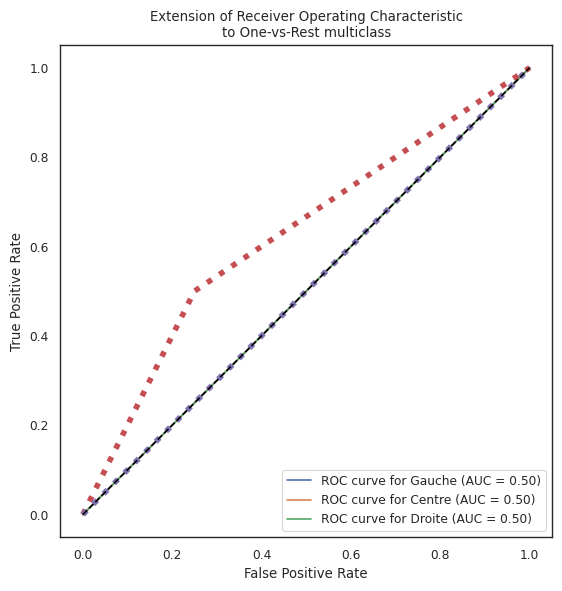

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


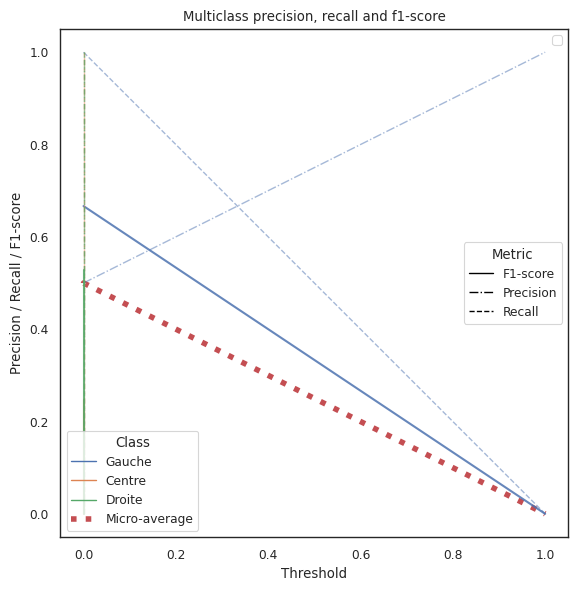

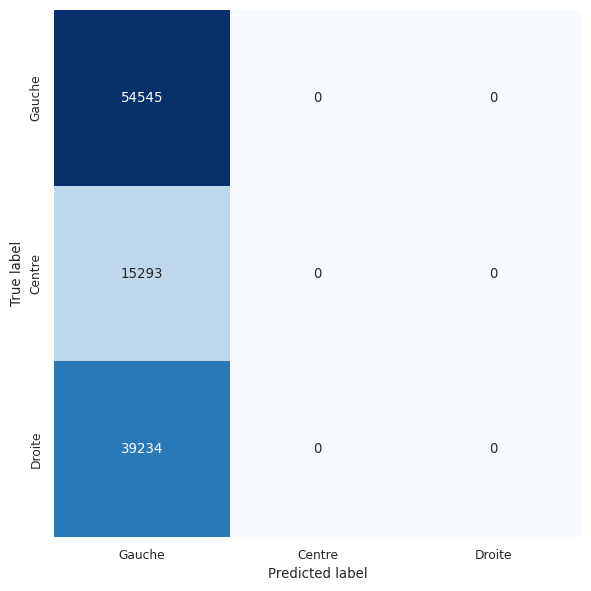

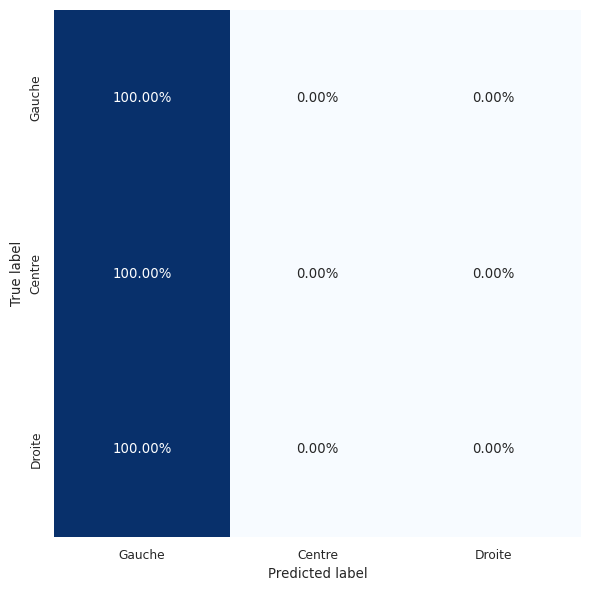

In [42]:
strategy = "most_frequent"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train, y_train)

y_pred = dummy.predict(y_test)
probs = dummy.predict_proba(y_test)

results = {
    "labels": y_test,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_matrix_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_matrix_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_matrix_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_matrix_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")

## Stratified

Micro-averaged One-vs-Rest ROC AUC score:
0.55
Macro-averaged One-vs-Rest ROC AUC score:
0.50


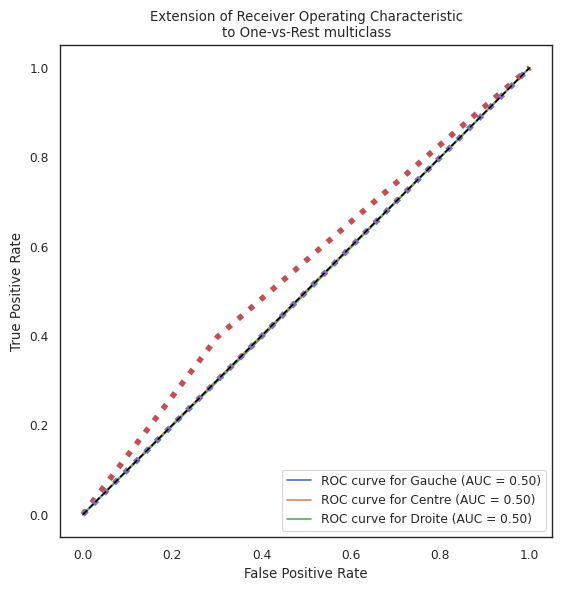

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


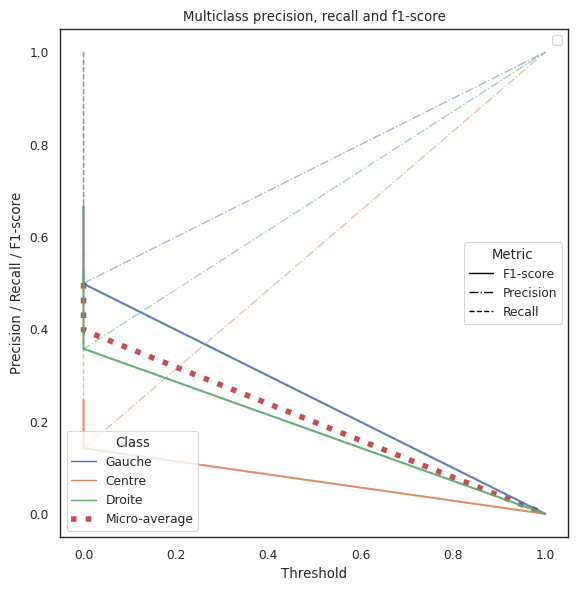

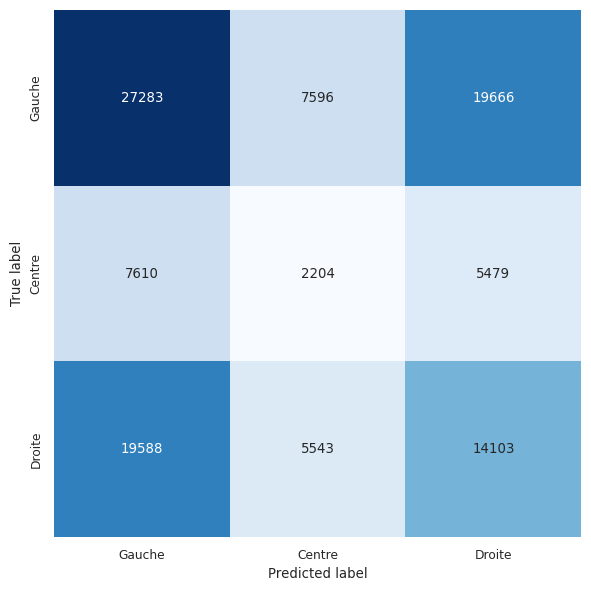

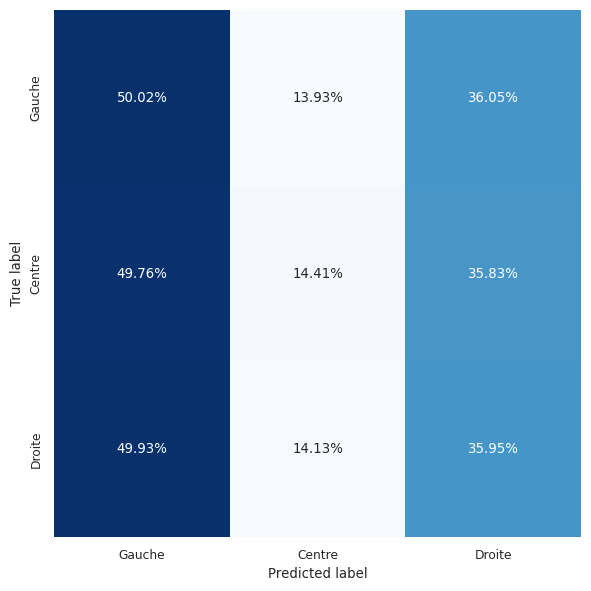

In [43]:
strategy = "stratified"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train, y_train)

y_pred = dummy.predict(y_test)
probs = dummy.predict_proba(y_test)

results = {
    "labels": y_test,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_matrix_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_matrix_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_matrix_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_matrix_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")

## Prior

/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Micro-averaged One-vs-Rest ROC AUC score:
0.68
Macro-averaged One-vs-Rest ROC AUC score:
0.50


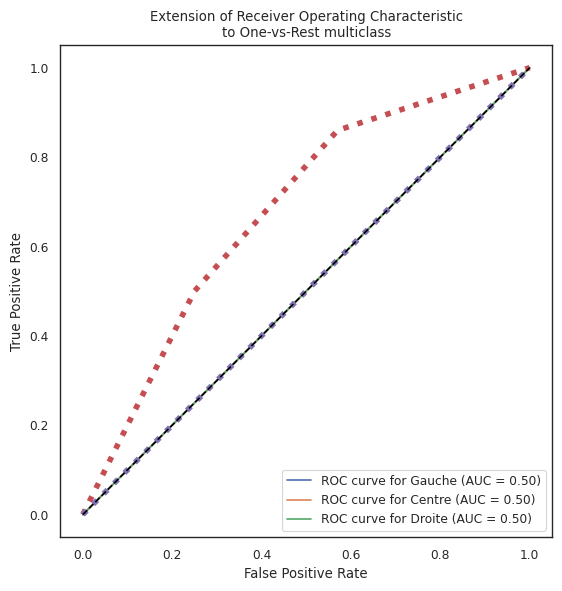

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


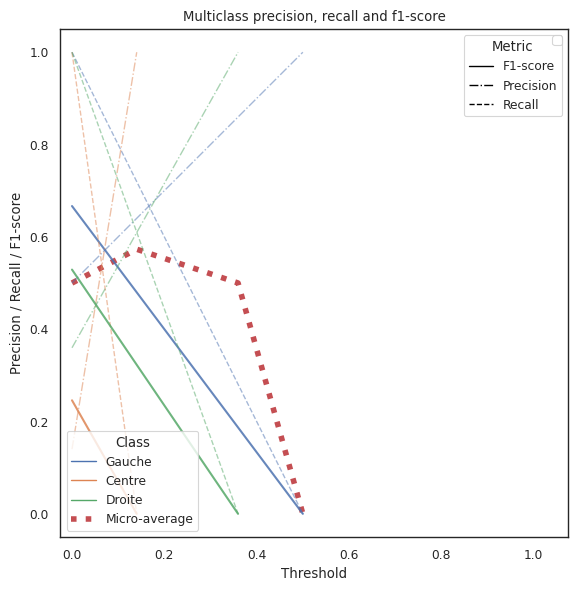

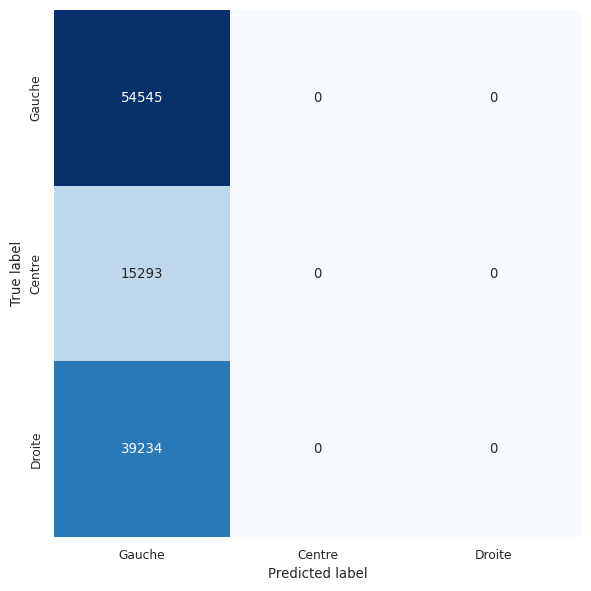

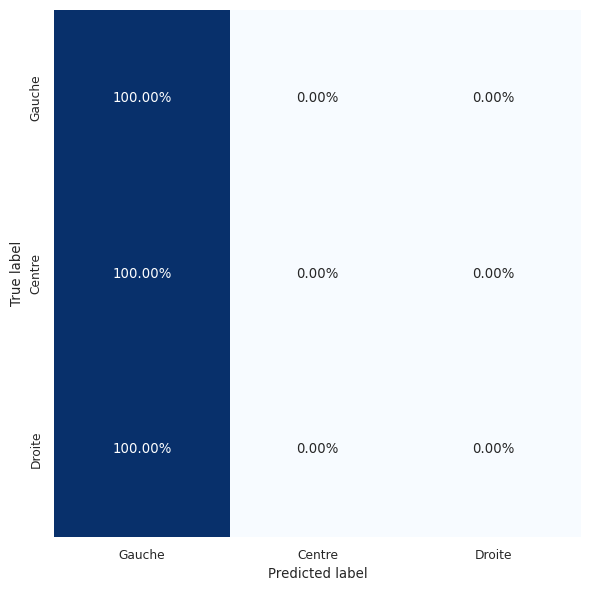

In [44]:
strategy = "prior"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train, y_train)

y_pred = dummy.predict(y_test)
probs = dummy.predict_proba(y_test)

results = {
    "labels": y_test,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_matrix_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_matrix_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_matrix_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_matrix_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")

## Prior binary

/home/gwatk/miniconda3/envs/pytorch-11-7/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


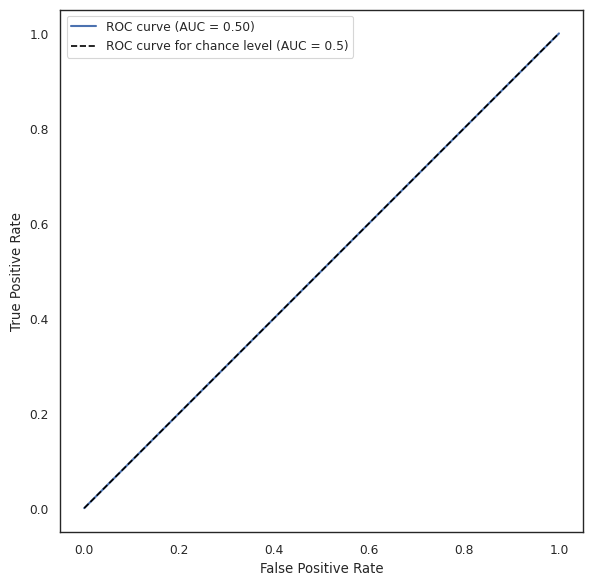

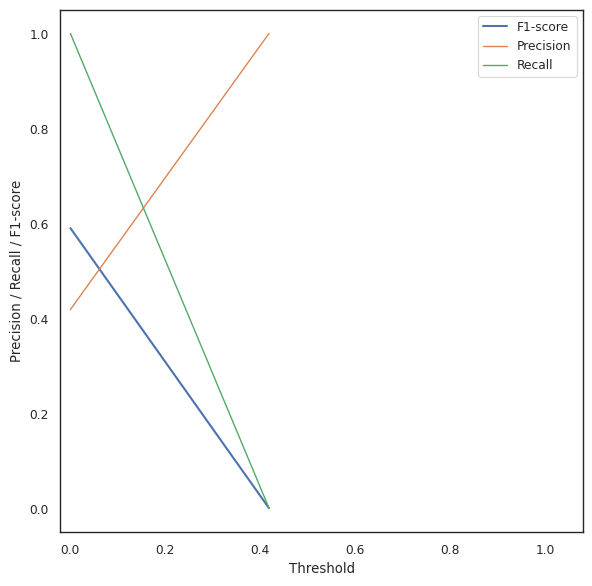

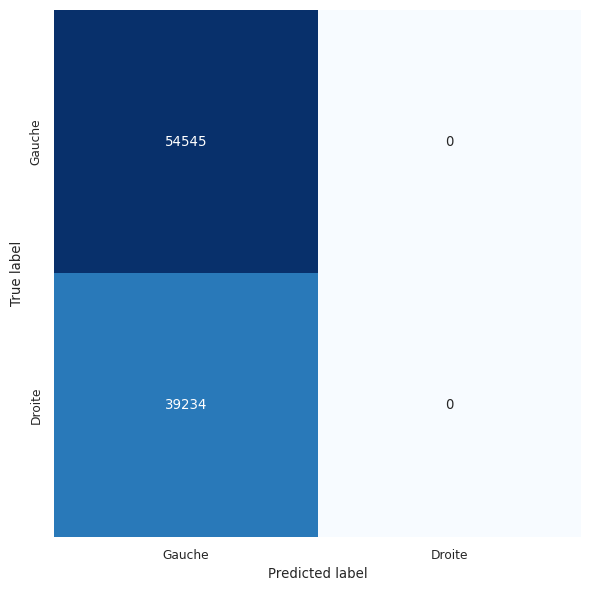

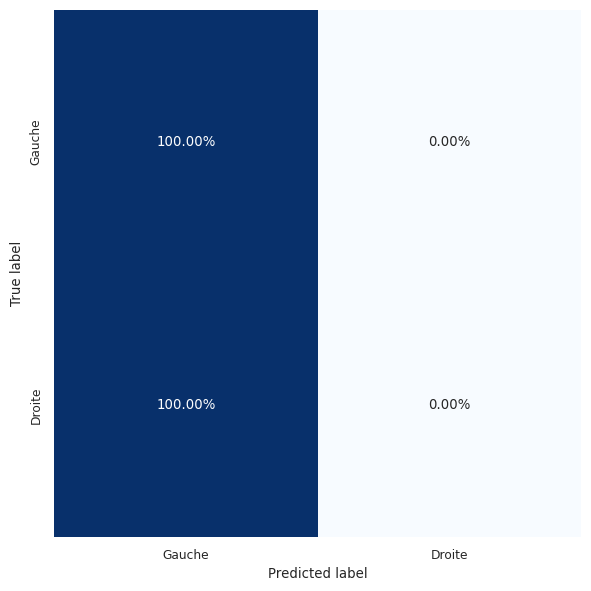

In [6]:
y_train_2 = y_train[y_train != 1]
y_train_2 = (y_train_2 / 2).astype(int)

y_test_2 = y_test[y_test != 1]
y_test_2 = (y_test_2 / 2).astype(int)

strategy = "prior"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train_2, y_train_2)

y_pred = dummy.predict(y_test_2)
probs = dummy.predict_proba(y_test_2)

results = {
    "labels": y_test_2,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics_binary(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve_binary(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve_binary(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")

## Uniform binary

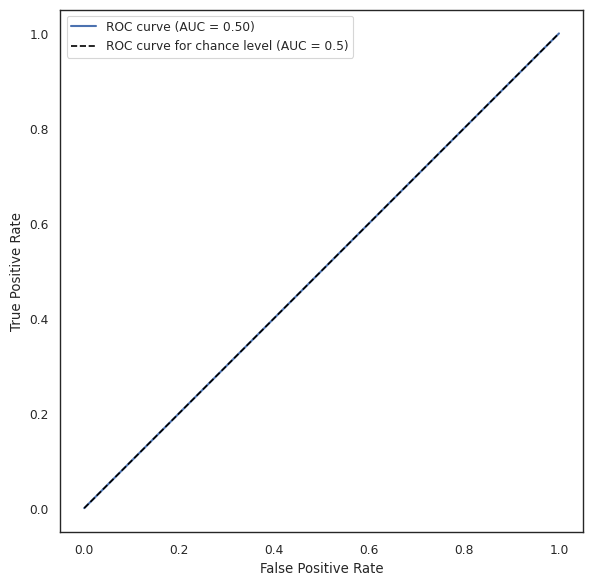

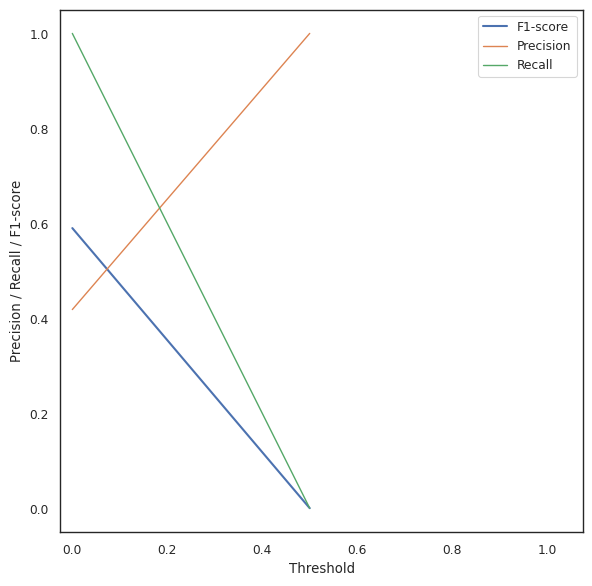

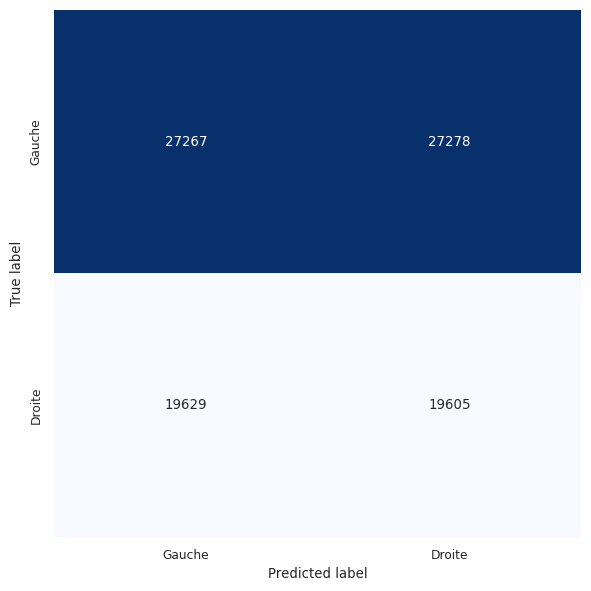

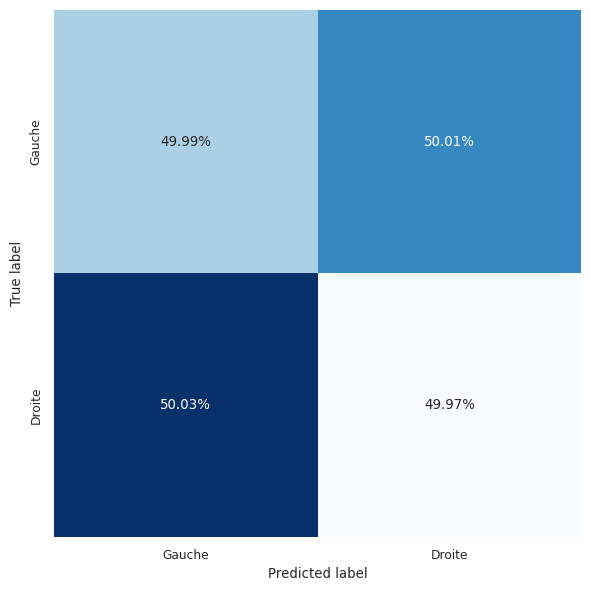

In [7]:
y_train_2 = y_train[y_train != 1]
y_train_2 = (y_train_2 / 2).astype(int)

y_test_2 = y_test[y_test != 1]
y_test_2 = (y_test_2 / 2).astype(int)

strategy = "uniform"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train_2, y_train_2)

y_pred = dummy.predict(y_test_2)
probs = dummy.predict_proba(y_test_2)

results = {
    "labels": y_test_2,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics_binary(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve_binary(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve_binary(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")

## Stratified binary

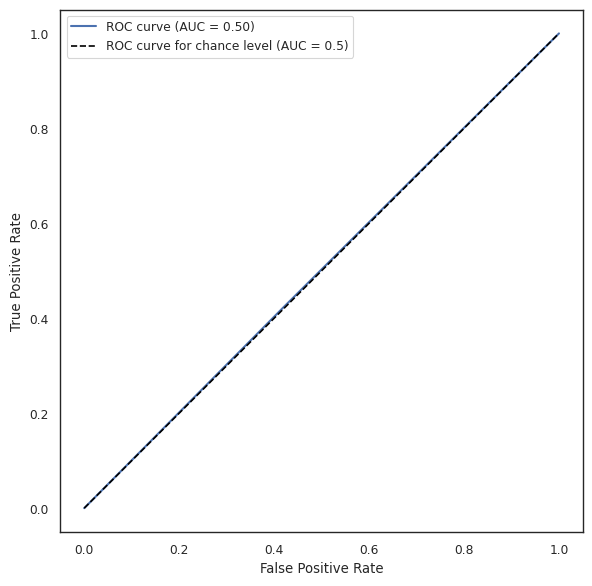

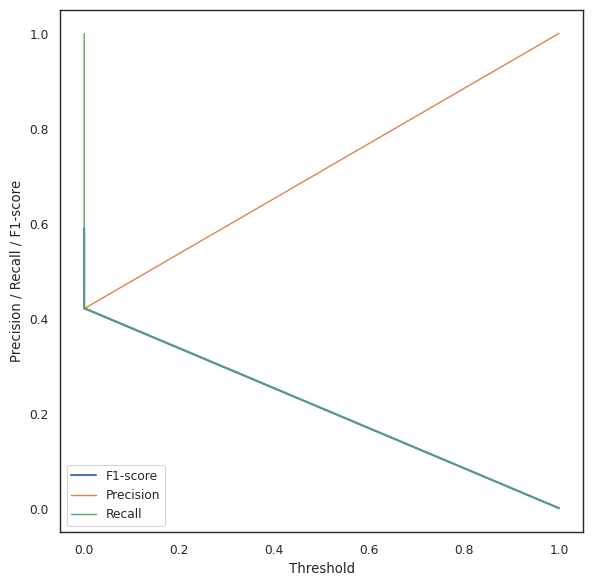

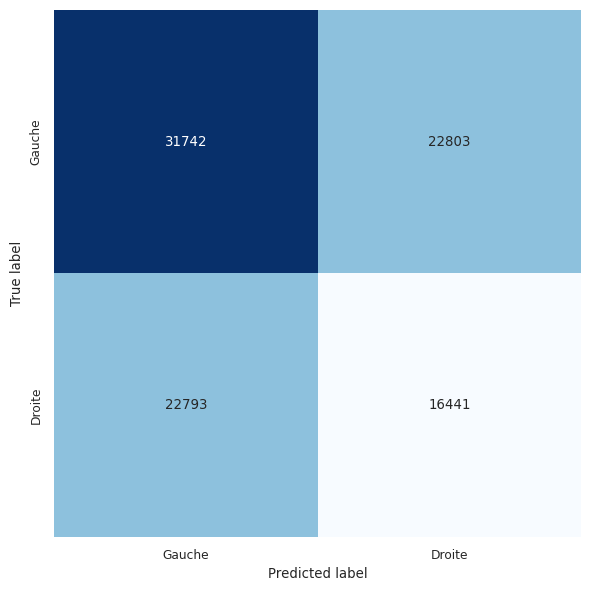

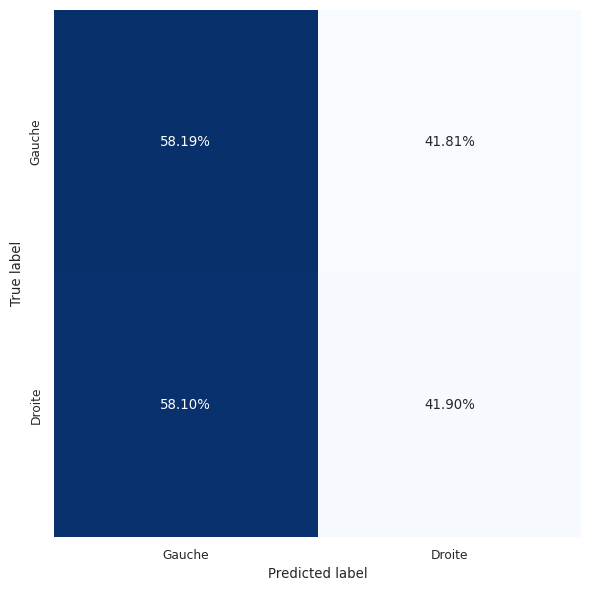

In [8]:
y_train_2 = y_train[y_train != 1]
y_train_2 = (y_train_2 / 2).astype(int)

y_test_2 = y_test[y_test != 1]
y_test_2 = (y_test_2 / 2).astype(int)

strategy = "stratified"
dummy = DummyClassifier(strategy=strategy)
dummy.fit(y_train_2, y_train_2)

y_pred = dummy.predict(y_test_2)
probs = dummy.predict_proba(y_test_2)

results = {
    "labels": y_test_2,
    "predictions": y_pred,
    "probs": probs,
}

metrics = calculate_metrics_binary(results)

RESULTS_PATH = f"../../results/dummies/dummy_classifier_{strategy}"
Path(RESULTS_PATH).mkdir(exist_ok=True, parents=True)
with open(Path(RESULTS_PATH) / "metrics.json", "w") as f:
    json.dump(metrics, f)

roc_fig = plot_roc_curve_binary(results, figsize=(6, 6), palette="deep")
roc_fig.savefig(Path(RESULTS_PATH) / "roc_curve.png")

pr_fig = plot_precision_recall_curve_binary(results, figsize=(6, 6), palette="deep")
pr_fig.savefig(Path(RESULTS_PATH) / "precision_recall_curve.png")

confusion_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized=None)
confusion_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix.png")

confusion_true_fig = plot_confusion_matrix(results, figsize=(6, 6), normalized="true")
confusion_true_fig.savefig(Path(RESULTS_PATH) / "confusion_matrix_true.png")